In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 불러오기
wine_data = pd.read_csv('./csv/winequality-white.csv', sep=';', encoding='utf-8')

# 품질 데이터별 그룹 나누고 수 세기
count_data = wine_data.groupby('quality')['quality'].count()
print(count_data)

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


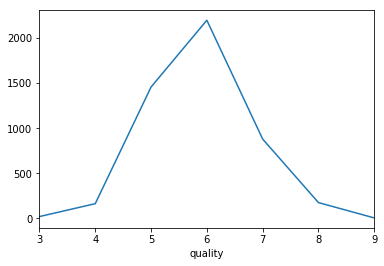

In [2]:
count_data.plot()
plt.savefig('wine_count_data.png')
plt.show() # 데이터 쏠림현상(skewed)이 많은 것을 알 수 있다.(4.xx면 5로 수렴할 것이다.)

<br>

### 쏠림현상 어떻게 해결할까
- 위에 그래프로 데이터 쏠림현상(skewed)이 많은 것을 알 수 있다.(4.xx면 5로 수렴할 것이다.)
- x값을 바꾸는건 데이터 조작 / 원하는 y값을 바꿔 모양을 조금 바꾸는건 가능
- 예를 들어, 3~9까지 있는 레이블의 범위를 [나쁨 보통 좋음]의 세가지 분류로 나눌 수 있다.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# 데이터 불러오기
wine_data = pd.read_csv('./csv/winequality-white.csv', sep=';', encoding='utf-8')

# 데이터를 레이블과 데이터로 분리하기
y = wine_data["quality"]
x = wine_data.drop('quality', axis=1)

newlist = []
for v in list(y):
    if v <= 4:
        newlist += [0]
    elif v <= 7:
        newlist += [1]
    else:
        newlist += [2]
        
y = newlist

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    test_size=0.3, 
                                                    random_state=0, 
                                                    shuffle = True)


from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 모델 중 분류모델
from sklearn.metrics import accuracy_score

# 모델링(랜덤포레스트)
model = RandomForestClassifier()

# 훈련
model.fit(x_train, y_train)

# 평가예측
score = model.score(x_test, y_test)
print("Score : ",score)

y_predict = model.predict(x_test)
print("정답률 : ", accuracy_score(y_test, y_predict))

Score :  0.9380952380952381
정답률 :  0.9380952380952381
